## Imports

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Helper functions

In [2]:
def plot_fig(figsize: tuple[int, int], rows: int, cols: int, data_list: tuple, title_list: tuple[str], plot_type_list: tuple[str], autoscale=tuple[bool]) -> None:
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    if rows == 1:
        for i in range(cols):
            if plot_type_list[i] == 'imshow':
                if autoscale[i]:
                    ax[i].imshow(X=data_list[i], cmap='gray')
                else:
                    ax[i].imshow(X=data_list[i], cmap='gray', vmin=0, vmax=255)
            elif plot_type_list[i] == 'hist':
                ax[i].hist(data_list[i].ravel(), bins=256, range=[0,256])
            elif plot_type_list[i] == 'plot':
                ax[i].plot(data_list[i])
            ax[i].set_title(title_list[i])
    else:
        for i in range(rows):
            for j in range(cols):
                if i*cols+j+1 > len(data_list):
                    break

                if plot_type_list[i*cols+j] == 'imshow':
                    if autoscale[i*cols+j]:
                        ax[i, j].imshow(X=data_list[i*cols+j], cmap='gray')
                    else:
                        ax[i, j].imshow(X=data_list[i*cols+j], cmap='gray', vmin=0, vmax=255)
                elif plot_type_list[i*cols+j] == 'hist':
                    ax[i, j].hist(data_list[i*cols+j].ravel(), bins=256, range=[0,256])
                elif plot_type_list[i*cols+j] == 'plot':
                    ax[i, j].plot(data_list[i*cols+j])
                ax[i, j].set_title(title_list[i*cols+j])
    plt.show()

## Question 1

For the image toys.gif

**A)** Read and display the image.  
**B)** Compute the 2-D FFT of the image and display one full-scaled copy of the magnitude spectrum.  

<img src="toys.gif" width="200" height="200"/>

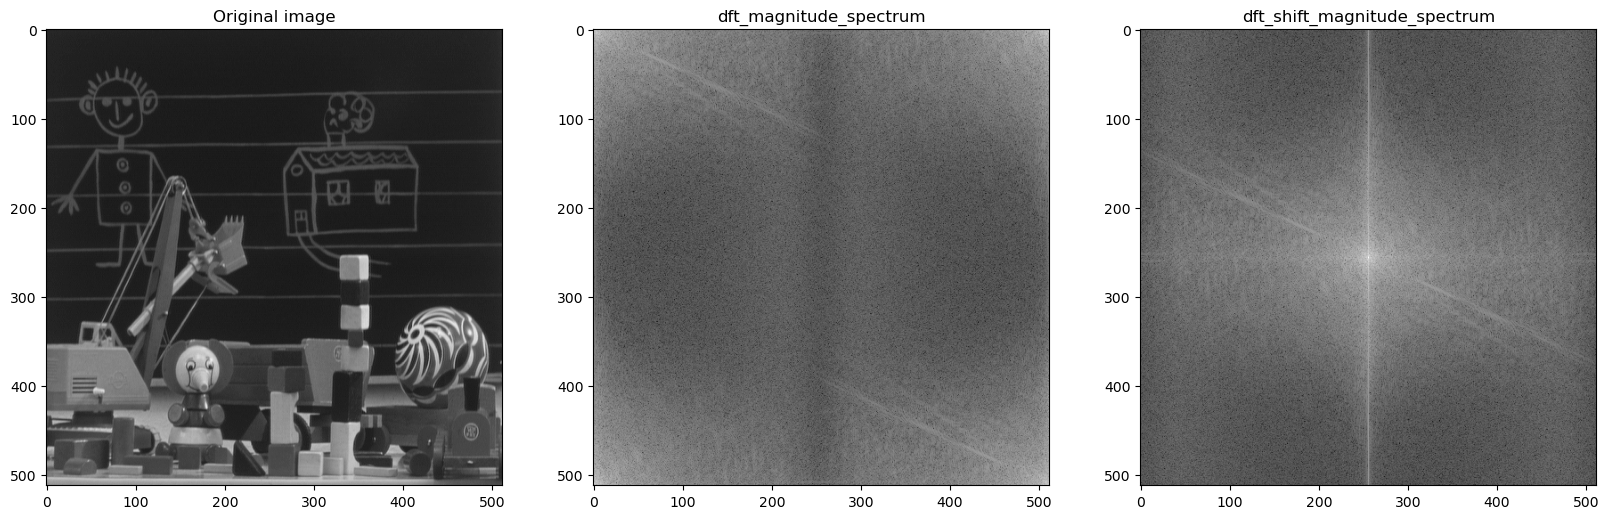

In [3]:
def fourier_transform(image: np.ndarray) -> tuple[np.ndarray]:
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    dft_magnitude_spectrum = np.log(np.abs(dft)+1)
    dft_shift_magnitude_spectrum = np.log(np.abs(dft_shift)+1)
    return dft, dft_shift, dft_magnitude_spectrum, dft_shift_magnitude_spectrum

q1_image = cv2.VideoCapture('toys.gif').read()[1][:, :, 0]
q1_dft_magnitude_spectrum, q1_dft_shift_magnitude_spectrum = fourier_transform(image=q1_image)[2:]
plot_fig(
    figsize=(20, 10), 
    rows=1, 
    cols=3, 
    data_list=(q1_image, q1_dft_magnitude_spectrum, q1_dft_shift_magnitude_spectrum), 
    title_list=("Original image", "dft_magnitude_spectrum", "dft_shift_magnitude_spectrum"), 
    plot_type_list=("imshow",)*3, 
    autoscale=(False, True, True)
)

## Question 2

For the image pepper.jpg, it is required to study the ringing effect of the Butterworth lowpass filter. Design the following filters and investigate the effect of changing the filter order and cutoff frequency on ringing. You need to display the filtered images and the shape of the filters in the spatial domain. A cross-sectional view of the filters in the spatial domain is required. Make sure to display the figures in a neat and organized way.

| Filter Number | Order | Cutoff Frequency |
|----------|----------|----------|
| 1 | 1 | 50 |
| 2 | 1 | 150 |
| 3 | 5 | 50 |
| 4 | 5 | 150 |

<img src="pepper.jpg" width="200" height="200"/>

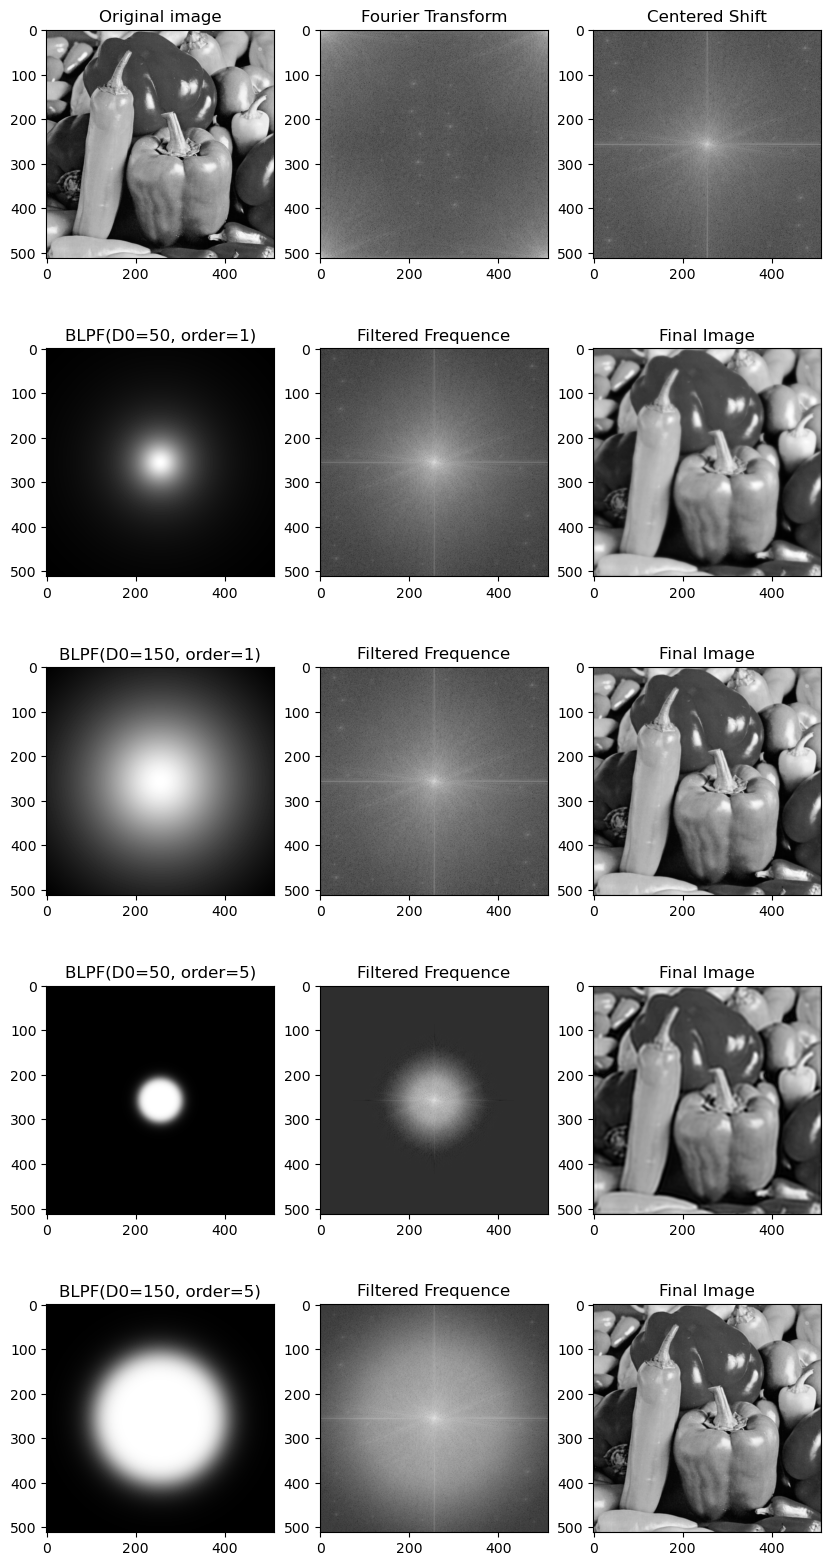

In [4]:
def lowpass_filter(image: np.ndarray, d0: int, n: int, filter_type: str) -> tuple[np.ndarray]:
    dft, dft_shift, dft_magnitude_spectrum, dft_shift_magnitude_spectrum = fourier_transform(image=image)
    h = np.zeros(image.shape)
    center_x = image.shape[0] // 2
    center_y = image.shape[1] // 2
    if filter_type == 'butterworth':
        for i in range(h.shape[0]):
            for j in range(h.shape[1]):   
                h[i, j] = 1 / (1 + (np.sqrt((i-center_x)**2 + (j-center_y)**2) / d0)**(2*n))
    elif filter_type == 'gaussian':
        for i in range(h.shape[0]):
            for j in range(h.shape[1]): 
                h[i, j] = np.exp(-(((i-center_x)**2 + (j-center_y)**2) / (2*d0**2)))
    elif filter_type == 'ideal':
        for i in range(h.shape[0]):
            for j in range(h.shape[1]): 
                h[i, j] = 1 if np.sqrt((i-center_x)**2 + (j-center_y)**2) <= d0 else 0
    dft_shift_filtered = dft_shift*h
    dft_shift_filtered_magnitude_spectrum = np.log(np.abs(dft_shift_filtered+1))
    final_image = np.abs(np.fft.ifft2(np.fft.ifftshift(dft_shift_filtered)))
    return dft_magnitude_spectrum, dft_shift_magnitude_spectrum, h, dft_shift_filtered_magnitude_spectrum, final_image

q2_image = cv2.imread('pepper.jpg', flags=cv2.IMREAD_GRAYSCALE)
q2_dft1, q2_dft_shift1, q2_h1, q2_dft_shift_filtered1, q2_final_image1 = lowpass_filter(image=q2_image, d0=50, n=1, filter_type='butterworth')
q2_h2, q2_dft_shift_filtered2, q2_final_image2 = lowpass_filter(image=q2_image, d0=150, n=1, filter_type='butterworth')[2:]
q2_h3, q2_dft_shift_filtered3, q2_final_image3 = lowpass_filter(image=q2_image, d0=50, n=5, filter_type='butterworth')[2:]
q2_h4, q2_dft_shift_filtered4, q2_final_image4 = lowpass_filter(image=q2_image, d0=150, n=5, filter_type='butterworth')[2:]

plot_fig(
    figsize=(10, 20), 
    rows=5, 
    cols=3, 
    data_list=(q2_image, q2_dft1, q2_dft_shift1, q2_h1, q2_dft_shift_filtered1, q2_final_image1, q2_h2, q2_dft_shift_filtered2, q2_final_image2, q2_h3, q2_dft_shift_filtered3, q2_final_image3, q2_h4, q2_dft_shift_filtered4, q2_final_image4), 
    title_list=("Original image", "Fourier Transform", "Centered Shift", "BLPF(D0=50, order=1)", "Filtered Frequence", "Final Image", "BLPF(D0=150, order=1)", "Filtered Frequence", "Final Image", "BLPF(D0=50, order=5)", "Filtered Frequence", "Final Image", "BLPF(D0=150, order=5)", "Filtered Frequence", "Final Image"), 
    plot_type_list=("imshow",)*15, 
    autoscale=(True,)*15
)

## Question 3

For the image prob2_s2012.gif

**A)** Compute and display the magnitude spectrum of the image.     
**B)** Investigate the image in the spatial and frequency domains and determine the type of noise that is corrupting the image.     
**C)** Design the proper filter and use it to restore the original image.       
**D)** Based on the filter in part C, can you display the noise component in the spatial domain? If so, show the image that represents the noise.


<img src="prob2_s2012.gif" width="200" height="200"/>

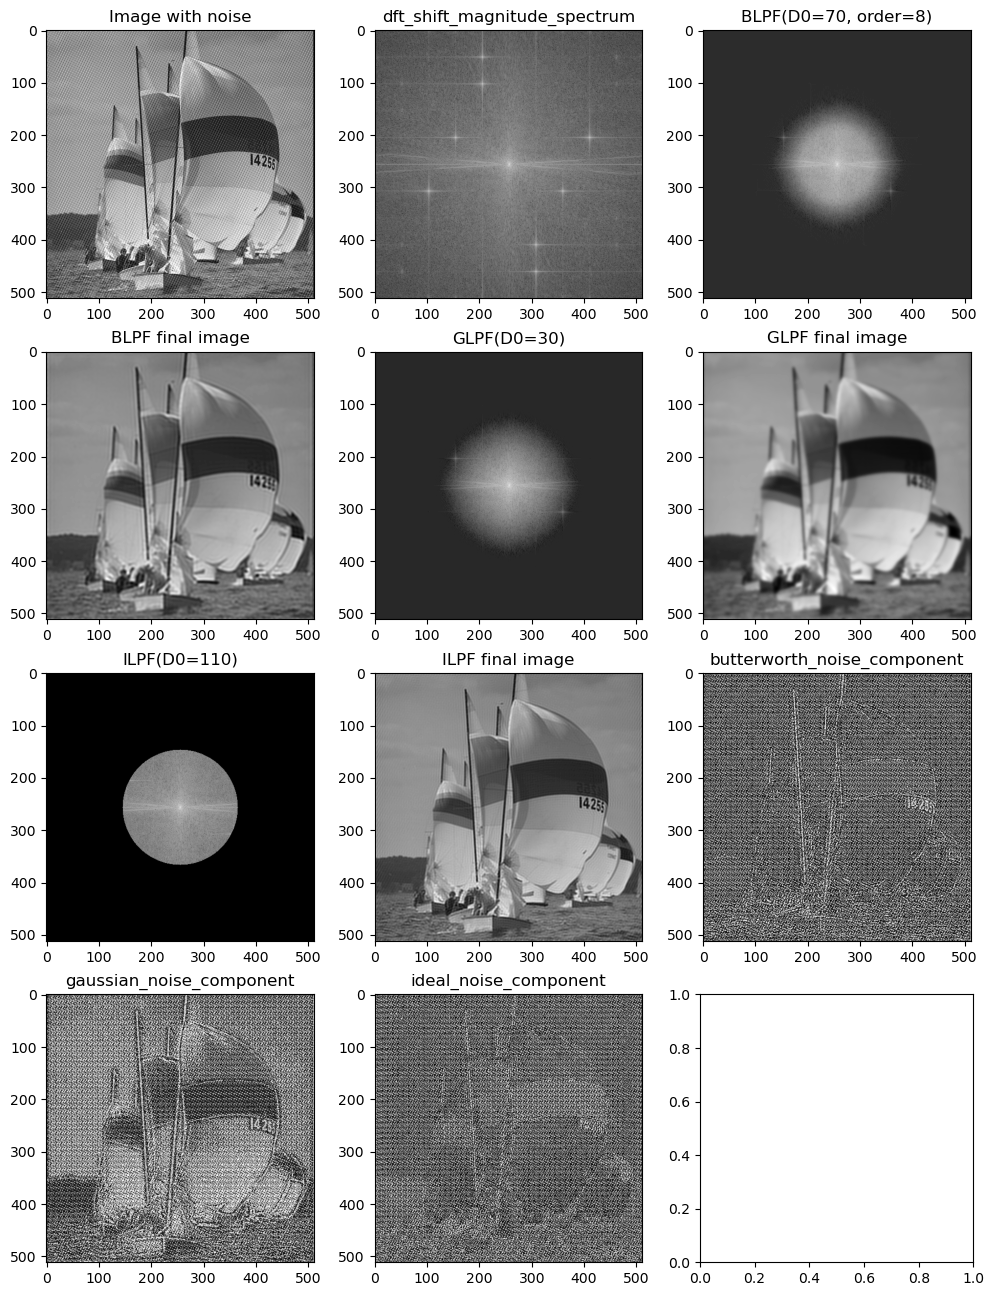

In [5]:
def get_noise_component(image_with_noise: np.ndarray, noise_removed_image: np.ndarray) -> np.ndarray:
    image_with_noise_normalized = cv2.normalize(src=image_with_noise, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    noise_removed_image_normalized = cv2.normalize(src=noise_removed_image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    noise_component = image_with_noise - noise_removed_image_normalized
    return noise_component

q3_image = cv2.VideoCapture('prob2_s2012.gif').read()[1][:, :, 0]
q3_dft_shift_magnitude_spectrum = fourier_transform(image=q3_image)[-1]
q3_butterworth_applied, q3_butterworth_applied_magnitude_spectrum = lowpass_filter(image=q3_image, d0=70, n=8, filter_type='butterworth')[-2:]
q3_gaussian_applied, q3_gaussian_applied_magnitude_spectrum = lowpass_filter(image=q3_image, d0=30, n=None, filter_type='gaussian')[-2:]
q3_ideal_applied, q3_ideal_applied_magnitude_spectrum = lowpass_filter(image=q3_image, d0=110, n=None, filter_type='ideal')[-2:]
q3_butterworth_noise_component = get_noise_component(image_with_noise=q3_image, noise_removed_image=q3_butterworth_applied_magnitude_spectrum)
q3_gaussian_noise_component = get_noise_component(image_with_noise=q3_image, noise_removed_image=q3_gaussian_applied_magnitude_spectrum)
q3_ideal_noise_component = get_noise_component(image_with_noise=q3_image, noise_removed_image=q3_ideal_applied_magnitude_spectrum)

plot_fig(
    figsize=(12, 16), 
    rows=4, 
    cols=3, 
    data_list=(q3_image, q3_dft_shift_magnitude_spectrum, q3_butterworth_applied, q3_butterworth_applied_magnitude_spectrum, q3_gaussian_applied, q3_gaussian_applied_magnitude_spectrum, q3_ideal_applied, q3_ideal_applied_magnitude_spectrum, q3_butterworth_noise_component, q3_gaussian_noise_component, q3_ideal_noise_component), 
    title_list=("Image with noise", "dft_shift_magnitude_spectrum", "BLPF(D0=70, order=8)", "BLPF final image", "GLPF(D0=30)", "GLPF final image", "ILPF(D0=110)", "ILPF final image", "butterworth_noise_component", "gaussian_noise_component", "ideal_noise_component"), 
    plot_type_list=("imshow",)*11, 
    autoscale=(False,)+(True,)*10
)

## Question 4

For the image trucknoise.gif

**A)** Display the magnitude spectrum of the image.     
**B)** Determine the type of noise in the frequency domain.     
**C)** Can you remove the noise? Which type of filter is needed?        
**D)** Display the noise-removed image and compute the PSNR of the image (truck.gif is the original image)


<div style="display: flex;">
    <img src="truck.gif" alt="Image 1" width="200" height="200"/>
    <img src="trucknoise.gif" alt="Image 2" width="200" height="200"/>
</div>

The PSNR between the noise removed image (with butterworth filter) and the original image is: 11.357147139513177
The PSNR between the noise removed image (with gaussian filter) and the original image is: 12.204803165417196
The PSNR between the noise removed image (with ideal filter) and the original image is: 7.250811945390891


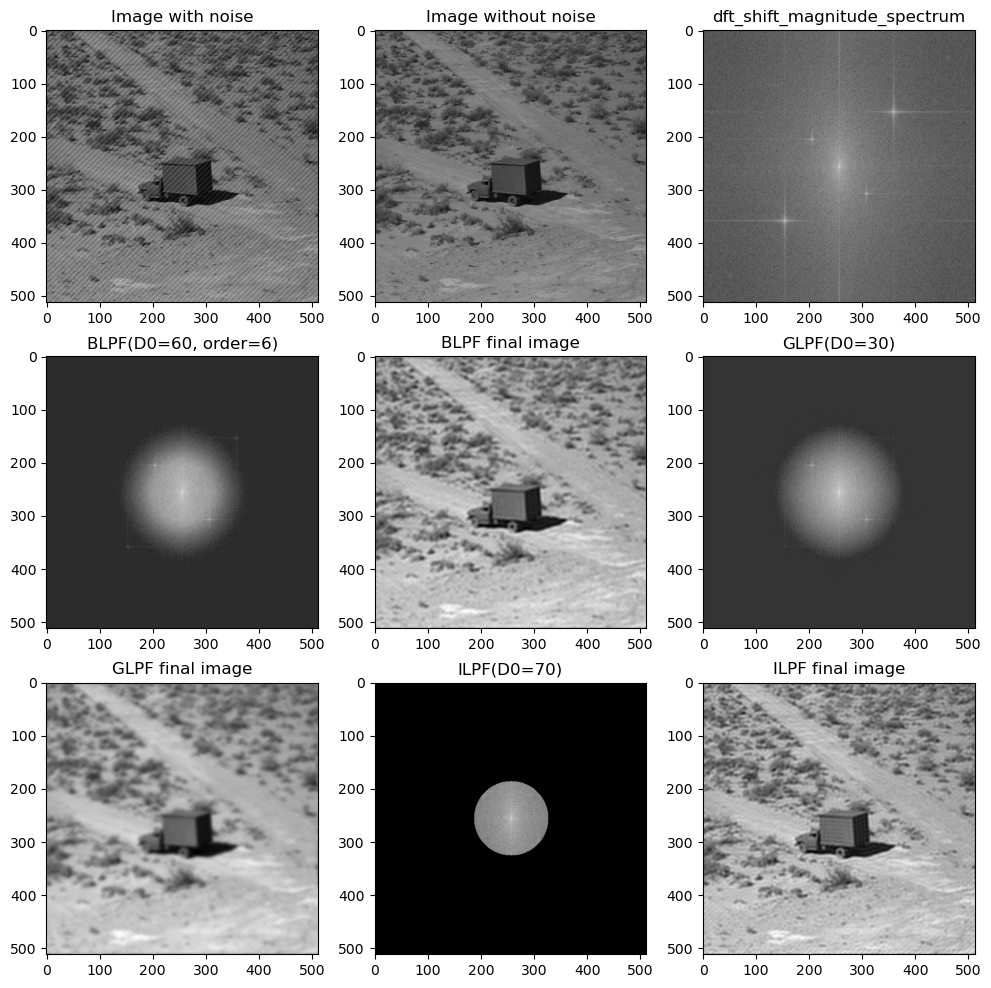

In [6]:
def calculate_PSNR(image1: np.ndarray, image2: np.ndarray) -> float:
    image1_normalized = cv2.normalize(src=image1, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    image2_normalized = cv2.normalize(src=image2, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return cv2.PSNR(src1=image1_normalized, src2=image2_normalized)

q4_image = cv2.VideoCapture('trucknoise.gif').read()[1][:, :, 0]
q4_image_without_noise = cv2.VideoCapture('truck.gif').read()[1][:, :, 0]
q4_dft_shift_magnitude_spectrum = fourier_transform(image=q4_image)[-1]
q4_butterworth_applied, q4_butterworth_applied_magnitude_spectrum = lowpass_filter(image=q4_image, d0=60, n=6, filter_type='butterworth')[-2:]
q4_gaussian_applied, q4_gaussian_applied_magnitude_spectrum = lowpass_filter(image=q4_image, d0=30, n=None, filter_type='gaussian')[-2:]
q4_ideal_applied, q4_ideal_applied_magnitude_spectrum = lowpass_filter(image=q4_image, d0=70, n=None, filter_type='ideal')[-2:]
q4_butterworth_psnr = calculate_PSNR(image1=q4_butterworth_applied, image2=q4_image_without_noise)
q4_gaussian_psnr = calculate_PSNR(image1=q4_gaussian_applied, image2=q4_image_without_noise)
q4_ideal_psnr = calculate_PSNR(image1=q4_ideal_applied, image2=q4_image_without_noise)
print(f"The PSNR between the noise removed image (with butterworth filter) and the original image is: {q4_butterworth_psnr}")
print(f"The PSNR between the noise removed image (with gaussian filter) and the original image is: {q4_gaussian_psnr}")
print(f"The PSNR between the noise removed image (with ideal filter) and the original image is: {q4_ideal_psnr}")

plot_fig(
    figsize=(12, 12), 
    rows=3, 
    cols=3, 
    data_list=(q4_image, q4_image_without_noise, q4_dft_shift_magnitude_spectrum, q4_butterworth_applied, q4_butterworth_applied_magnitude_spectrum, q4_gaussian_applied, q4_gaussian_applied_magnitude_spectrum, q4_ideal_applied, q4_ideal_applied_magnitude_spectrum), 
    title_list=("Image with noise", "Image without noise", "dft_shift_magnitude_spectrum", "BLPF(D0=60, order=6)", "BLPF final image", "GLPF(D0=30)", "GLPF final image", "ILPF(D0=70)", "ILPF final image"), 
    plot_type_list=("imshow",)*9, 
    autoscale=(False, False, True, True, True, True, True, True, True)
)